# FFT Algorithm


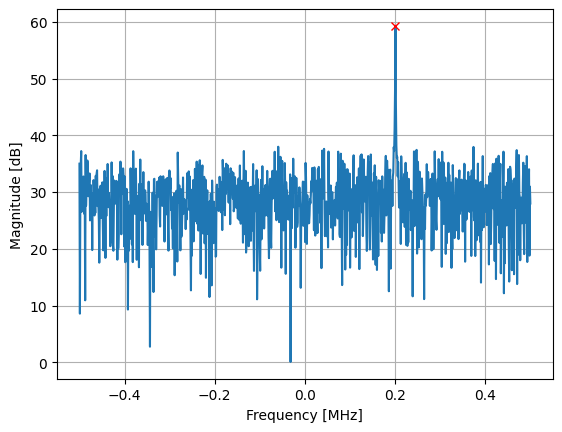

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def fft(x):
    N = len(x)
    if N == 1:
        return x
    twiddle_factors = np.exp(-2j * np.pi * np.arange(N//2) / N)
    x_even = fft(x[::2]) # yay recursion!
    x_odd = fft(x[1::2])
    return np.concatenate([x_even + twiddle_factors * x_odd,
                           x_even - twiddle_factors * x_odd])

# Simulate a tone + noise
sample_rate = 1e6
f_offset = 0.2e6 # 200 kHz offset from carrier
N = 1024
t = np.arange(N)/sample_rate
s = np.exp(2j*np.pi*f_offset*t)
n = (np.random.randn(N) + 1j*np.random.randn(N))/np.sqrt(2) # unity complex noise
r = s + n # 0 dB SNR

# Perform fft, fftshift, convert to dB
X = fft(r)
X_shifted = np.roll(X, N//2) # equivalent to np.fft.fftshift
X_mag = 10*np.log10(np.abs(X_shifted)**2)

# Plot results
f = np.linspace(sample_rate/-2, sample_rate/2, N)/1e6 # plt in MHz
plt.plot(f, X_mag)
plt.plot(f[np.argmax(X_mag)], np.max(X_mag), 'rx') # show max
plt.grid()
plt.xlabel('Frequency [MHz]')
plt.ylabel('Magnitude [dB]')
plt.show()

# FFT

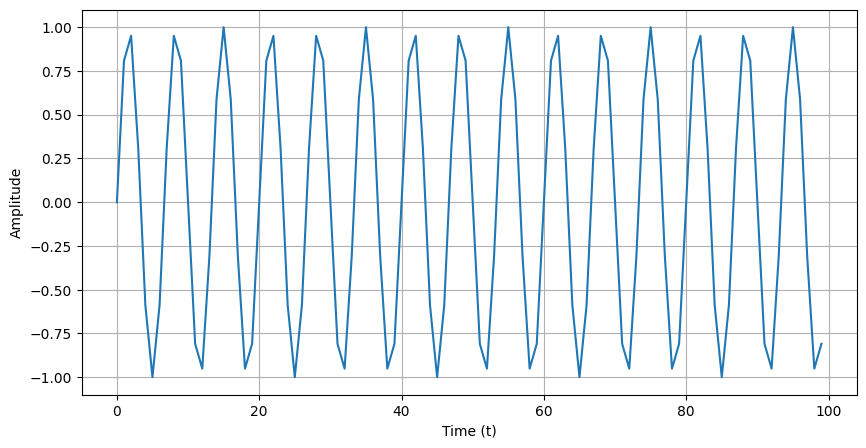

In [13]:
t = np.arange(100)
s = np.sin(0.15*2*np.pi*t)
plt.figure(figsize=(10, 5))
plt.plot(t, s, label='sin wave (freq=0.15 Hz)')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.show()

In [14]:
S = np.fft.fft(s)
S

array([ 5.61172848e-15+0.00000000e+00j, -2.05901480e-15-2.22044605e-15j,
        1.46416187e-14+2.73945391e-15j, -1.82127598e-14+1.99840144e-15j,
        6.97373842e-15-2.68870565e-16j, -4.59336056e-15-3.55271368e-15j,
        5.45600173e-15-2.20591530e-15j,  1.69795457e-14+8.83945043e-15j,
       -1.02696062e-14+1.19416335e-14j, -2.66521717e-14-1.72098087e-14j,
        5.99794329e-15+3.32983787e-15j,  3.01918408e-14-1.74887721e-14j,
        9.82508930e-15+1.39689600e-14j,  3.04874342e-15+1.25413129e-14j,
        1.34412064e-14+2.69505312e-14j, -8.79402832e-14-5.00000000e+01j,
       -5.05251937e-15-2.35625632e-14j,  2.94597207e-15-2.66199239e-14j,
        1.09915274e-14-1.55302554e-14j,  1.43198343e-14+6.32469409e-16j,
        9.80273420e-15-5.19843387e-15j,  2.80974686e-15-7.84518144e-16j,
        2.68636931e-14+1.62524192e-14j, -2.01123577e-14+1.80757806e-14j,
       -7.36127218e-15-5.37865347e-16j, -6.42578266e-15-3.55271368e-15j,
        1.50038364e-14-1.78040911e-15j, -8.63221341

Text(0, 0.5, 'Phase (radians)')

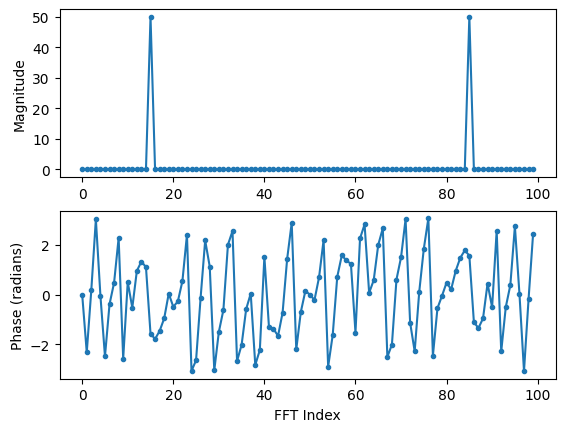

In [15]:
S_mag = np.abs(S)
S_phase = np.angle(S)
plt.subplot(2, 1, 1)
plt.plot(t,S_mag,'.-')
plt.ylabel('Magnitude')
plt.subplot(2, 1, 2)
plt.plot(t,S_phase,'.-')
plt.xlabel('FFT Index')
plt.ylabel('Phase (radians)')

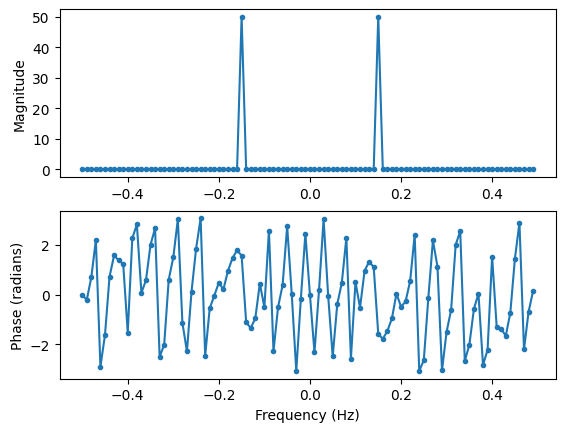

In [16]:
# do fft with fft shift

Fs = 1 # Hz
N = 100 # number of points to simulate, and our FFT size
t = np.arange(N) # because our sample rate is 1 Hz
s = np.sin(0.15*2*np.pi*t)
S = np.fft.fftshift(np.fft.fft(s))
S_mag, S_phase = np.abs(S), np.angle(S)
f = np.arange(Fs/-2, Fs/2, Fs/N)
plt.subplot(2, 1, 1)
plt.plot(f, S_mag,'.-')
plt.ylabel('Magnitude')
plt.subplot(2, 1, 2)
plt.plot(f, S_phase,'.-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.show()

# Windowing

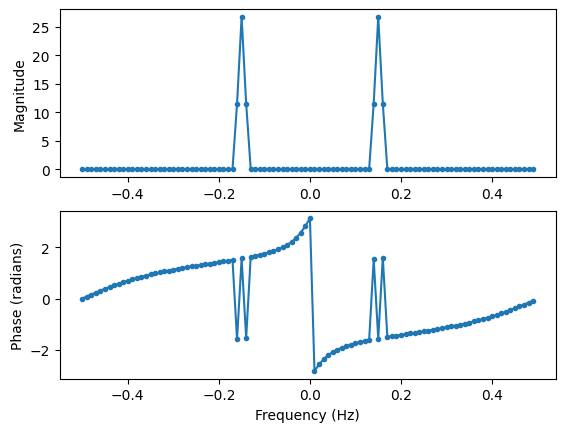

In [17]:
Fs = 1 # Hz
N = 100 # number of points to simulate, and our FFT size
t = np.arange(N) # because our sample rate is 1 Hz
s = np.sin(0.15*2*np.pi*t)
s *= np.hamming(N)
S = np.fft.fftshift(np.fft.fft(s))
S_mag, S_phase = np.abs(S), np.angle(S)
f = np.arange(Fs/-2, Fs/2, Fs/N)
plt.subplot(2, 1, 1)
plt.plot(f, S_mag,'.-')
plt.ylabel('Magnitude')
plt.subplot(2, 1, 2)
plt.plot(f, S_phase,'.-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.show()

# Spectogram

Text(0, 0.5, 'Amplitude')

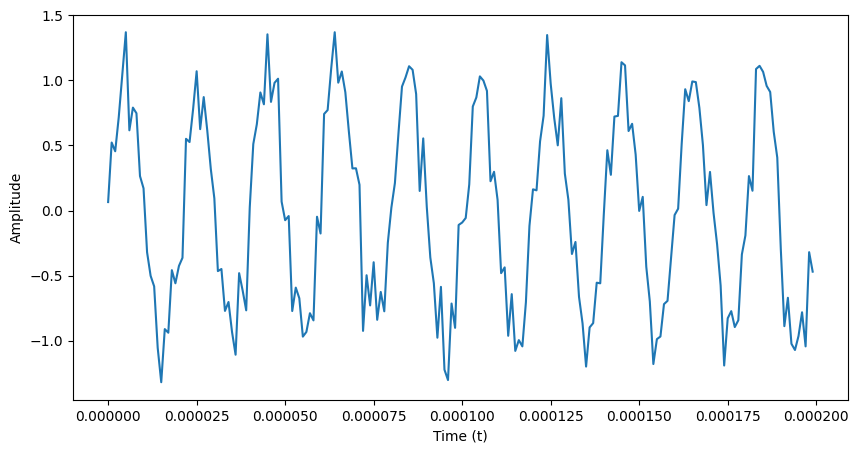

In [18]:
sample_rate = 1e6
# Generate tone plus noise
t = np.arange(1024*1000)/sample_rate # time vector
f = 50e3 # freq of tone
tone = np.sin(2*np.pi*f*t)
noise = 0.2*np.random.randn(len(t))
x = tone + noise
plt.figure(figsize=(10, 5))
plt.plot(t[:200], x[:200], linestyle='-')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')

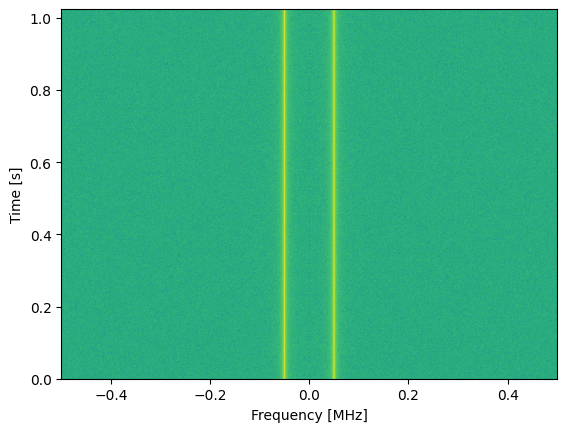

In [19]:
fft_size = 1024
num_rows = len(x) // fft_size # // is an integer division which rounds down
spectrogram = np.zeros((num_rows, fft_size))
for i in range(num_rows):
    spectrogram[i,:] = 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(x[i*fft_size:(i+1)*fft_size])))**2)

plt.imshow(spectrogram, aspect='auto', extent = [sample_rate/-2/1e6, sample_rate/2/1e6, 0, len(x)/sample_rate])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Time [s]")
plt.show()